C:\Users\11577\AppData\Local\Temp/ipykernel_13084/1990211069.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tx= total_df[total_df.record_date>'2016-6-01'][total_df.record_date<'2016-7-01']
C:\Users\11577\AppData\Local\Temp/ipykernel_13084/1990211069.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ty=total_df[total_df.record_date>'2016-6-01'][total_df.record_date<'2016-7-01']['power_consumption']


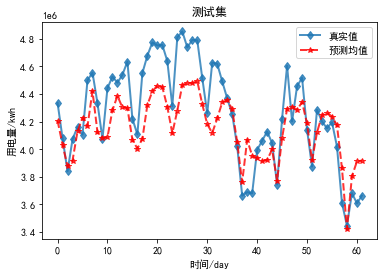

随机森林平均准确度为: 0.5770758294042126
决策树平均准确度为: 0.6415073660819053
决策树平均准确度为: 0.8997912701290252


In [280]:
import matplotlib.pyplot as plt
from pylab import *
import matplotlib;#matplotlib.use('TkAgg')
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
import numpy as np
import pandas as pd

data = pd.read_csv('total_df.csv')  # 读取负荷
data.columns = data.columns.str.replace('Unnamed: 0', '序号') #给第一列赋名为序号
del data['序号']  # 删除 序号列，这一列是多余的
total_df=data.copy()
total_df.loc[:,'record_date']=pd.to_datetime(total_df['record_date'])
## 分离训练集和测试集
#将2016年7月以前的数据为训练集，2016年7月后为测试集。（取2个月为测试集
train_x = total_df[total_df.record_date<'2016-7-01'] #[547 rows x 146 columns]
train_y = total_df[total_df.record_date<'2016-7-01']['power_consumption']
train_y=np.array(train_y)#(547,)
test_x = total_df[total_df.record_date>='2016-7-01']
test_y=total_df[total_df.record_date>='2016-7-01']['power_consumption']
test_y=np.array(test_y)#(62,)
# x去掉'record_date', 'power_consumption'两列
drop_columns = ['record_date', 'power_consumption']
train_x = train_x.drop(drop_columns, axis=1)#[547 rows x 144 columns]
test_x = test_x.drop(drop_columns, axis=1)#[62 rows x 144 columns]
tx= total_df[total_df.record_date>'2016-6-01'][total_df.record_date<'2016-7-01']
ty=total_df[total_df.record_date>'2016-6-01'][total_df.record_date<'2016-7-01']['power_consumption']
ty=np.array(ty)
tx = tx.drop(drop_columns, axis=1)
###区间预测

####1决策树回归####
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_DecisionTreeRegressor = DecisionTreeRegressor()
model_RandomForestRegressor = RandomForestRegressor(n_estimators=80,max_depth=100)
y_1_DTR = model_DecisionTreeRegressor.fit(train_x,train_y)
y_1_RFR= model_RandomForestRegressor.fit(train_x,train_y)
score_DTR = model_DecisionTreeRegressor.score(test_x,test_y)
score_RFR = model_RandomForestRegressor.score(test_x,test_y)
# score_all=[]
# for i in range(143):
#     model_RandomForestRegressor = RandomForestRegressor(n_estimators=100,max_depth=i)
#     y_1_RFR= model_RandomForestRegressor.fit(train_x,train_y)
#     score_RFR = model_RandomForestRegressor.score(test_x,test_y)
#     score_all.append(score_RFR)
# plt.plot(range(1,11),rfc_s,label = "RandomForest")
# plt.plot(range(1,11),clf_s,label = "Decision Tree")
# plt.legend()
# plt.show()
# ####2SVR回归####
# from sklearn.svm import SVR
# model_SVR=SVR(C=1.0, epsilon=0.2)
# ####3KNN回归####
# from sklearn import neighbors
# model_KNeighborsRegressor = neighbors.KNeighborsRegressor()

# ####4随机森林回归####
# from sklearn import ensemble
# model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树

# ####5Adaboost回归####
# from sklearn import ensemble
# model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树

# ####6GBRT回归####
# from sklearn import ensemble
# model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
# ####7Bagging回归####
# from sklearn.ensemble import BaggingRegressor
# model_BaggingRegressor = BaggingRegressor()


x1=np.arange(len(test_x))
y_1 = model_RandomForestRegressor.predict(test_x)
# y_1 = model_RandomForestRegressor.predict(tx)
plt.plot(test_y,marker='d',linestyle='-',linewidth=2,alpha=0.8,label='真实值')
plt.plot(y_1,color='r',marker='*',linestyle='--',linewidth=2,alpha=0.8,label='预测均值')
# plt.fill_between(x1 ,y_mean_1, y_mean_2, facecolor="green",alpha=.5,label='上下限(2*std时)')
plt.xlabel('时间/day')
plt.ylabel('用电量/kwh')
plt.title('测试集')
plt.legend()
plt.show()
#打印误差
print('随机森林平均准确度为:',model_RandomForestRegressor.score(test_x,test_y))#显示平均准确度
print('决策树平均准确度为:',model_DecisionTreeRegressor.score(test_x,test_y))#显示平均准确度
print('决策树平均准确度为:',model_RandomForestRegressor.score(tx,ty))#显示平均准确度

In [200]:
z=model_RandomForestRegressor.predict(tx)
z

array([3614813.5])

0.3870634343356887 22


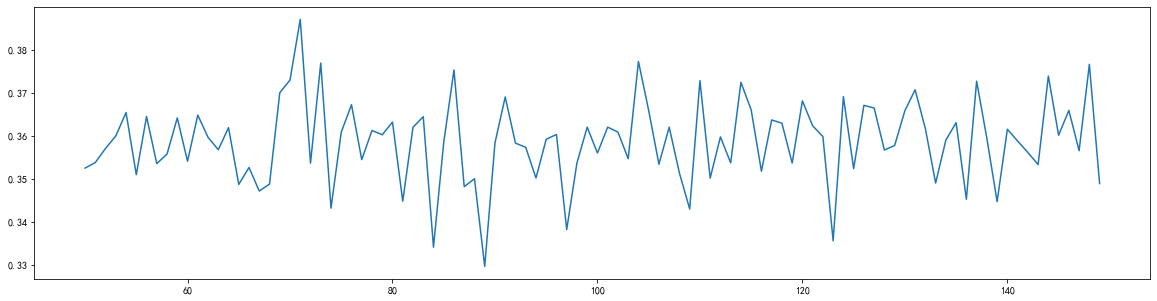

In [268]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
superpa = []
for i in range(100):
    rfc = RandomForestRegressor(n_estimators=80,n_jobs=-1,max_depth=i+50)
    rfc_s = cross_val_score(rfc,train_x,train_y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)#打印出：最高精确度取值，max(superpa))+1指的是森林数目的数量n_estimators
plt.figure(figsize=[20,5])
plt.plot(range(50,150),superpa)
plt.show()

In [42]:
import  pandas as pd
import datetime
from chinese_calendar import is_holiday, is_workday
import chinese_calendar as calendar
time=pd.to_datetime('2023--01--22')
is_workday(time)
holiday_name = calendar.get_holiday_detail(time)
holiday_name

(True, 'Spring Festival')